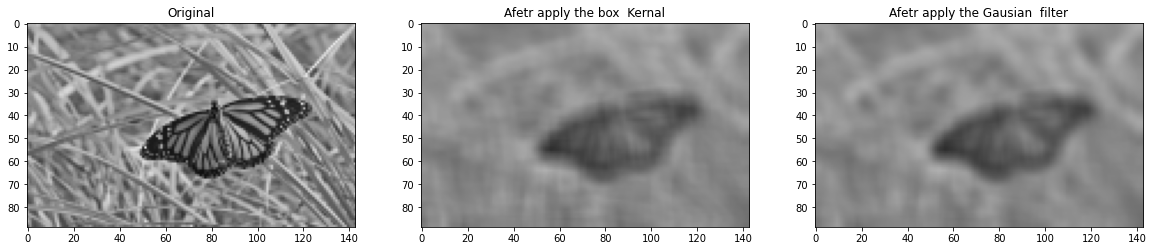

In [26]:
########################################################
#ex1
#Box Kernal
########################################################
%matplotlib inline
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_8)
assert img is not None

box_kernal = 1./81*np.ones((9,9))
sigma = 4
k_size = 9
gausiankernal = cv.getGaussianKernel(9,sigma)

imgWithKernal = cv.filter2D(img,-1,box_kernal)
imgWithGausianKernal = cv.GaussianBlur(img,(k_size,k_size),sigma) 
    
convertedImg1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
convertedImg2 = cv.cvtColor(imgWithKernal, cv.COLOR_BGR2RGB)
convertedImg3 = cv.cvtColor(imgWithGausianKernal, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3, figsize = (20,20))
ax[0].imshow(convertedImg1, cmap = 'gray',vmin = 0,vmax = 255)
ax[1].imshow(convertedImg2, cmap = 'gray',vmin = 0,vmax = 255)
ax[2].imshow(convertedImg3, cmap = 'gray',vmin = 0,vmax = 255)
ax[0].set_title('Original')
ax[1].set_title("Afetr apply the box  Kernal")
ax[2].set_title("Afetr apply the Gausian  filter")

plt.show()

## EX3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


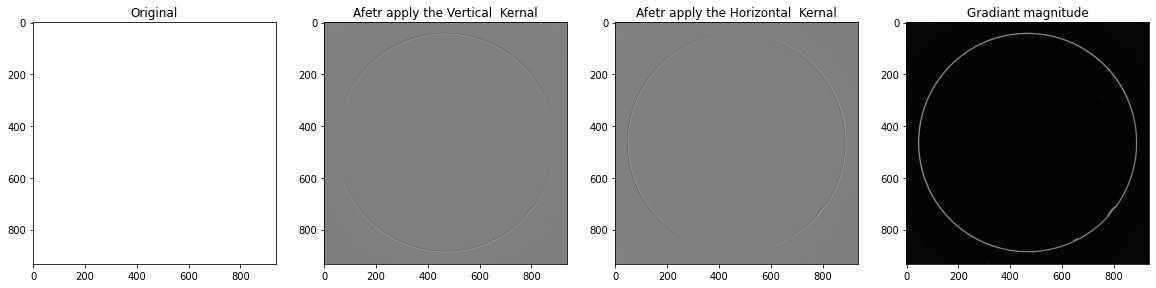

In [36]:
########################################################
#ex3
#Contact lense gradiant computation
########################################################


import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

img = cv.imread('contact_lens.tif', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

Sobel_V = np.array([[-1,-2,-1],[0,0,0],[1,2,1]],dtype = np.float32)
Sobel_H = np.array([[-1,0,1],[-2,0,2],[-1,0,1]],dtype = np.float32)
imgWithSobelV = cv.filter2D(img,-1,Sobel_V)
imgWithSobelH = cv.filter2D(img,-1,Sobel_H)

grad_img = np.sqrt(imgWithSobelV ** 2 +imgWithSobelH ** 2)

fig, ax = plt.subplots(1,4, figsize = (20,20))
ax[0].imshow(convertedImg1, cmap = 'gray',vmin = 0,vmax = 255)
ax[1].imshow(imgWithSobelV, cmap = 'gray',vmin = -1020,vmax = 1020)
ax[2].imshow(imgWithSobelH, cmap = 'gray',vmin = -1020,vmax = 1020)
ax[3].imshow(grad_img, cmap = 'gray')
ax[0].set_title('Original')
ax[1].set_title("Afetr apply the Vertical  Kernal")
ax[2].set_title("Afetr apply the Horizontal  Kernal")
ax[3].set_title("Gradiant magnitude")


plt.show()

## EX 4

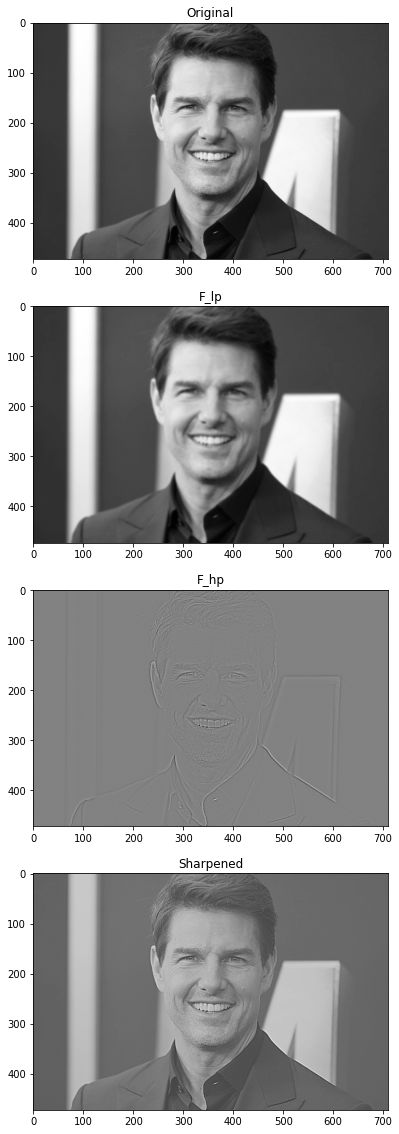

In [48]:
########################################################
#ex4
#Sharpening
########################################################
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

img = cv.imread('tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None
sigma = 2
gausiankernal = cv.getGaussianKernel(5,sigma)
f_lp = cv.sepFilter2D(img,-1,gausiankernal,gausiankernal)
f_hp = img - f_lp
sharpend = cv.addWeighted(img,1.0,f_hp,2.0,0)
fig, ax = plt.subplots(4,1, figsize = (20,20))
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(f_lp, cmap = 'gray')
ax[2].imshow(f_hp, cmap = 'gray')
ax[3].imshow(sharpend, cmap = 'gray')
ax[0].set_title('Original')
ax[1].set_title("F_lp")
ax[2].set_title("F_hp")
ax[3].set_title("Sharpened")
plt.show()

